In [71]:
import numpy as np
import ast
with open('data2.txt') as f:
    data = f.read()

type(ast.literal_eval(data)), type(data)

np.array(ast.literal_eval(data)).astype('uint8')

array([[0, 1],
       [2, 3],
       [4, 5]], dtype=uint8)

In [72]:
import ast , numpy as np
with open('train_data.txt') as f:
    train_data = np.array(ast.literal_eval(f.read())).astype('float32')

with open('train_labels.txt') as f:
    train_labels = np.array(ast.literal_eval(f.read())).astype('int')
    

(28, 28, 1)


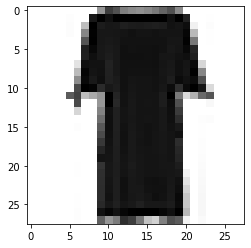

In [73]:
print(train_data[0,:,:,:].shape)
import matplotlib.pyplot as plt
plt.imshow(train_data[2, :, :, :].reshape(28, 28), cmap='gray_r')
plt.show()

In [74]:
# 檢查數據狀況
train_data.shape, train_labels.shape, train_labels[:1]

((50, 28, 28, 1), (50, 3), array([[0, 1, 0]]))

In [75]:
# 建立model 
# the Sequential model
# the Model class used with the functional API.

In [76]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Flatten

# the Sequential model type I
model = Sequential()

model.add( Conv2D(filters= 5, kernel_size=(2,2), 
                  strides=(1, 1), 
                  padding='same', 
                  #dilation_rate=2 , 
                  input_shape=(28, 28, 1)
                 ) 
         )
model.add( Activation('relu')  )


model.add( Conv2D(filters= 5, kernel_size=(2,2), 
                  strides=(1, 1), 
                  padding='same', 
                  #dilation_rate=2 , 
                 ) 
         )
model.add( Activation('relu')  )

model.add( Conv2D(filters= 5, kernel_size=(2,2), 
                  strides=(1, 1), 
                  padding='same', 
                  #dilation_rate=2 , 
                 ) 
         )
model.add( Activation('relu')  )

model.add(Flatten())
model.add( Dense(32) )
model.add( Activation('relu')  )
model.add( Dense(3)  )
model.add( Activation('softmax')  ) 

model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 5)         25        
_________________________________________________________________
activation_21 (Activation)   (None, 28, 28, 5)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 5)         105       
_________________________________________________________________
activation_22 (Activation)   (None, 28, 28, 5)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 28, 28, 5)         105       
_________________________________________________________________
activation_23 (Activation)   (None, 28, 28, 5)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 3920)             

In [77]:
# the Sequential model type II
model = Sequential()
model.add( Conv2D(filters= 5, kernel_size=(2,2), activation='relu', padding='same', input_shape=(28, 28, 1)) )
model.add( Conv2D(filters= 5, kernel_size=(2,2), activation='relu', padding='same') )
model.add( Conv2D(filters= 5, kernel_size=(2,2), activation='relu', padding='same') )
model.add( Flatten())

model.add( Dense(32, activation='relu', input_dim=784) )
model.add( Dense(3, activation='softmax') )
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 28, 28, 5)         25        
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 28, 28, 5)         105       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 28, 28, 5)         105       
_________________________________________________________________
flatten_8 (Flatten)          (None, 3920)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                125472    
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 99        
Total params: 125,806
Trainable params: 125,806
Non-trainable params: 0
________________________________________________

In [78]:
# the Sequential model type III
model = Sequential([
                    Conv2D(filters= 5, kernel_size=(2,2), padding='same', input_shape=(28, 28, 1)), 
    
                    Activation('relu'),
    
                    Conv2D(filters= 5, kernel_size=(2,2), padding='same'), 
    
                    Activation('relu'),
    
                    Conv2D(filters= 5, kernel_size=(2,2), padding='same'), 
    
                    Activation('relu'),
    
                    Flatten(),
    
                    Dense(32), 
                    Activation('relu'),
    
                    Dense(3),  
                    Activation('softmax'),
                   ])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 28, 28, 5)         25        
_________________________________________________________________
activation_26 (Activation)   (None, 28, 28, 5)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 28, 28, 5)         105       
_________________________________________________________________
activation_27 (Activation)   (None, 28, 28, 5)         0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 28, 28, 5)         105       
_________________________________________________________________
activation_28 (Activation)   (None, 28, 28, 5)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 3920)             

In [79]:
# the Model class used with the functional API.
from keras.models import Model
from keras.layers import Input, Dense , ReLU, Softmax, Conv2D, Flatten

a = Input(shape=(28, 28, 1))

dense = Conv2D(filters= 5, kernel_size=(2,2), padding='same')(a)
dense = ReLU()(dense)

dense = Conv2D(filters= 5, kernel_size=(2,2), padding='same')(dense)
dense = ReLU()(dense)

dense = Conv2D(filters= 5, kernel_size=(2,2), padding='same')(dense)
dense = ReLU()(dense)

dense = Flatten()(dense)

dense = Dense(32)(dense)
dense = ReLU()(dense)

dense = Dense(3)(dense)
b     = Softmax()(dense)


model = Model(inputs=a, outputs=b)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 28, 28, 5)         25        
_________________________________________________________________
re_lu_5 (ReLU)               (None, 28, 28, 5)         0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 28, 28, 5)         105       
_________________________________________________________________
re_lu_6 (ReLU)               (None, 28, 28, 5)         0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 28, 28, 5)         105       
_________________________________________________________________
re_lu_7 (ReLU)               (None, 28, 28, 5)         0   

In [80]:
# 編譯
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# <keras.callbacks.callbacks.History at 0x1b93db60748>
history = model.fit(train_data, train_labels, batch_size=10, epochs=5, verbose=1)

Epoch 1/5
50/50 [==============================] - 0s 6ms/step - loss: 1.0125 - accuracy: 0.4400
Epoch 2/5
50/50 [==============================] - 0s 1ms/step - loss: 0.6782 - accuracy: 0.8800
Epoch 3/5
50/50 [==============================] - 0s 2ms/step - loss: 0.4186 - accuracy: 0.9800
Epoch 4/5
50/50 [==============================] - 0s 2ms/step - loss: 0.2356 - accuracy: 0.9800
Epoch 5/5
50/50 [==============================] - 0s 1ms/step - loss: 0.1278 - accuracy: 0.9800


In [81]:
# <keras.callbacks.callbacks.History at 0x1b93db60748>
# history
history.history.get('loss'), history.history.get('accuracy')

([1.0125471115112306,
  0.6782320618629456,
  0.418585205078125,
  0.23560704290866852,
  0.12775132209062576],
 [0.44, 0.88, 0.98, 0.98, 0.98])

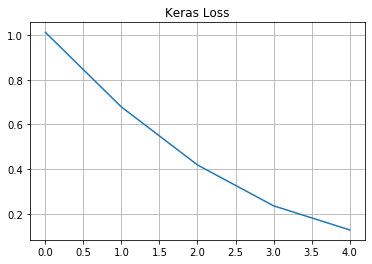

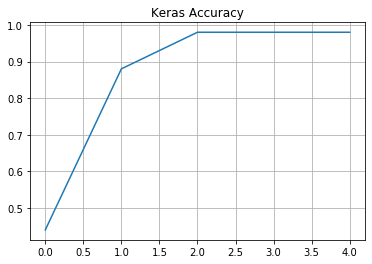

In [82]:
import matplotlib.pyplot as plt
plt.title('Keras Loss')
plt.plot(history.history.get('loss'))
plt.grid()
plt.show()

import matplotlib.pyplot as plt
plt.title('Keras Accuracy')
plt.plot(history.history.get('accuracy'))
plt.grid()
plt.show()

In [83]:
model.evaluate(train_data, train_labels)[1] * 100.0

50/50 [==============================] - 0s 1ms/step


98.00000190734863

In [ ]:
# 

In [84]:
model.layers

In [87]:
data = ['a', 'b', 'c']
for i, d in enumerate(data):
    print(i, d)

0 a
1 b
2 c


In [89]:
# filters 來產生新圖像
weights = []
for i, m in enumerate(model.layers):
    if type(m) == Conv2D :
        weights.append( m.get_weights() )
        print('filters ', i, m.filters)
len(weights)
# 表示有兩段 CONV2D

filters  1 5
filters  3 5
filters  5 5


3

In [103]:
weights[0][0][:, :, 0  , 0]

array([[ 0.13376431,  0.3069638 ],
       [-0.35394442, -0.021495  ]], dtype=float32)

In [94]:
# 十張  CNN 圖片     # 0 ... 9
for w in weights:
    print(w[0][:, :, 0  , 0])

[[ 0.13376431  0.3069638 ]
 [-0.35394442 -0.021495  ]]
[[-0.28684402 -0.14940798]
 [-0.11696643  0.07581561]]
[[ 0.18014836  0.11403303]
 [ 0.30782583 -0.26997155]]


In [95]:
def conv_kernel(kernel, img):
    height, width = img.shape[0]//kernel.shape[0], img.shape[1]//kernel.shape[1]
    conv = np.zeros((height, width))
    for ii in range(height):
        for jj in range(width):
            val = np.sum(kernel * img[ii*kernel.shape[0]:ii*kernel.shape[0]+kernel.shape[0], 
                                      jj*kernel.shape[1]:jj*kernel.shape[1]+kernel.shape[1]])
            conv[ii, jj] = val
    
    return(conv)

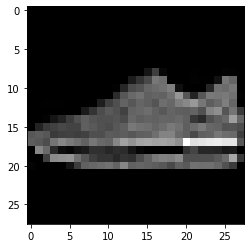

In [97]:
# 原始圖片
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow( train_data[4, :, :, :].reshape(28, 28) , cmap='gray' )
plt.show()

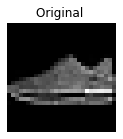

Con2D Layer 0


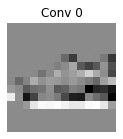

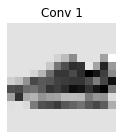

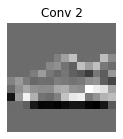

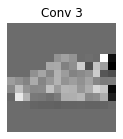

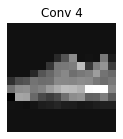

--------------------------------------------------
Con2D Layer 1


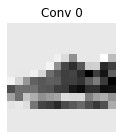

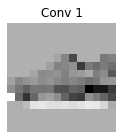

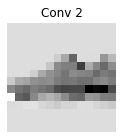

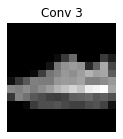

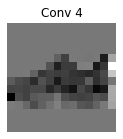

--------------------------------------------------
Con2D Layer 2


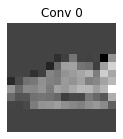

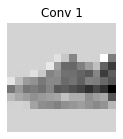

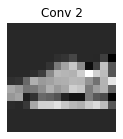

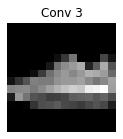

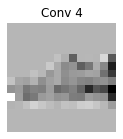

--------------------------------------------------


In [105]:
#                     filter = 0

clothes = 4

import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow( train_data[clothes, :, :, :].reshape(28, 28) , cmap='gray' )
plt.title('Original ')
plt.axis('off')
plt.show()
for i, w in enumerate(weights):
    print('Con2D Layer', str(i))
    for j in range(5): # 唯一沒有修改 **********
        kernel = w[0][:, :, 0  , j]
        img = train_data[clothes, :, :, :].reshape(28, 28)  # 針對指定影像處理
        img_filter = conv_kernel( kernel,  img)
        plt.figure(figsize=(2,2))
        plt.imshow( img_filter, cmap='gray' )
        plt.title('Conv '+ str(j))
        plt.axis('off')
        plt.show()
    print('-'*50)